# Day 1 - Data Science Essentials Program
## Intro to Pandas
- importing data from: Excel files, CSV files, SQL databases, websites (read_html)
- exploring the data and cleaning up (keeping only unique records, formatting of numbers and dates, blank rows)
    - how many rows, columns, data types of each column
    - unique categories in each column
    - stats of numerical cols (distribution data, average, min, max, median, etc.)
    - na or null values --> .dropna(), .fillna()
- merging/joining the data --> .concat, .merge
- adding calculated fields
- sorting, filtering
- grouping data --> pivot tables
- "EXCEL for Python"
- pandas cheat sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
- new data types: DataFrame (2-d table with multiple columns), Series (one column)

In [9]:
import pandas as pd
sp500 = pd.read_csv('StockData/SP500.csv')
#df = pd.read_excel('ExData/Data Manipulation Worksheet.xlsx') #by default the first tab
df = pd.read_excel('ExData/Data Manipulation Worksheet.xlsx', sheet_name='Financing Table')

**Coffee break until 10:20am BST/5:20 am**

In [10]:
type(df)

pandas.core.frame.DataFrame

## Exploring and Cleaning Data
- `.head()`, `.tail()` --> first/last 5 rows
- `.info()`
    - date --> should be datetime
    - numeric columns --> int or float
    - you might want to look for null values, do any of the columns have any blanks?

In [18]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1260 non-null   object 
 1   Open       1260 non-null   float64
 2   High       1260 non-null   float64
 3   Low        1260 non-null   float64
 4   Close      1260 non-null   float64
 5   Adj Close  1260 non-null   float64
 6   Volume     1260 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              557 non-null    datetime64[ns]
 1   ISSUER            564 non-null    object        
 2   TYPE              558 non-null    object        
 3   SIZE              558 non-null    object        
 4   INDUSTRY          557 non-null    object        
 5   LEAD UNDERWRITER  557 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 26.8+ KB


In [14]:
# df.head() #5 rows
# df.head(20)
df.tail(20)

,DATE,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
548,2006-06-19,Comerica Bank,CD Notes,300.11,Finance,Merrill Lynch
549,2006-06-19,Consolidated Edison Inc.,Notes,300.12,Utility,Salomon Smith Barney
550,2006-06-20,MBNA Capital Securities D,Preferred Securities,300.1,Finance,Salomon Smith Barney
551,2006-06-20,Anworth Mortgage Asset Corp,Equity Follow-On Offering,117,Real Estate,"Friedman, Billings, Ramsey"
552,2006-06-21,Alabama Power Company,Sr Notes,350,Utility,Lehman Brothers
553,2006-06-21,Sears Roebuck Acceptance Corp,Sr Notes,250.1,Finance,Merrill Lynch
554,2006-06-21,DQE Inc,Equity Follow-On Offering,202.5,Utility,Lehman Brothers
555,2006-06-21,MassMutual,Global Notes,200.1,Finance,Morgan Stanley
556,2006-06-21,Conceptus Inc,Equity Follow-On Offering,72,Healthcare,UBS Warburg
557,NaT,NaN,NaN,NaN,NaN,NaN


### Re-import data and fix while importing

In [19]:
sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,9/30/13,1687.260010,1687.260010,1674.989990,1681.550049,1681.550049,3308630000
1,10/01/13,1682.410034,1696.550049,1682.069946,1695.000000,1695.000000,3238690000
2,10/02/13,1691.900024,1693.869995,1680.339966,1693.869995,1693.869995,3148600000
3,10/03/13,1692.349976,1692.349976,1670.359985,1678.660034,1678.660034,3279650000
4,10/04/13,1678.790039,1691.939941,1677.329956,1690.500000,1690.500000,2880270000


In [26]:
# sp500 = pd.read_csv('StockData/SP500.csv', parse_dates=['Date'])
sp500 = pd.read_csv('StockData/SP500.csv', parse_dates=['Date'], date_format='%m/%d/%y')
            #most of the time you don't need the date_format, will figure it out on its own
            #date_format ---> source format of the dates
                #the way it fixes is always the same -->  %Y-%m-%d   (  yyyy-mm-dd)

In [28]:
# sp500.info()
# sp500.head()

In [37]:
aapl = pd.read_csv('StockData/AAPL.csv')
# aapl.info()
#code
#code
#you already did a lot of work on cleaning the data, and then LATER you need to fix the dates

In [33]:
pd.to_datetime("4/9/2024") #April 9
pd.to_datetime("4/9/2024", format="%d/%m/%Y") #September 4

Timestamp('2024-09-04 00:00:00')

In [39]:
# aapl['Date'].dt.year
    #this doesn't work yet

In [40]:
aapl['Date'] = pd.to_datetime(aapl['Date'], format='%m/%d/%y')

In [49]:
aapl['Quarter'] = aapl['Date'].dt.quarter
aapl['Month'] = aapl['Date'].dt.month
aapl['Year'] = aapl['Date'].dt.year
        # dt.month, .year, .day, .quarter, etc.
aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Quarter,Month,Year
0,2013-10-01,68.349998,69.877144,68.339996,69.708572,63.523125,88470900,4,10,2013
1,2013-10-02,69.375717,70.257141,69.107140,69.937141,63.731426,72296000,4,10,2013
2,2013-10-03,70.072861,70.335716,68.677139,69.058571,62.930801,80688300,4,10,2013
3,2013-10-04,69.122856,69.228569,68.371429,69.004288,62.881340,64717100,4,10,2013
4,2013-10-07,69.508568,70.378571,69.335716,69.678574,63.495800,78073100,4,10,2013


In [36]:
aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-10-01,68.349998,69.877144,68.339996,69.708572,63.523125,88470900
1,2013-10-02,69.375717,70.257141,69.107140,69.937141,63.731426,72296000
2,2013-10-03,70.072861,70.335716,68.677139,69.058571,62.930801,80688300
3,2013-10-04,69.122856,69.228569,68.371429,69.004288,62.881340,64717100
4,2013-10-07,69.508568,70.378571,69.335716,69.678574,63.495800,78073100


In [53]:
# df = pd.read_excel('ExData/Data Manipulation Worksheet.xlsx', skipfooter=11)
                #skip the last 11 rows
# df.info()

In [60]:
#df = df.iloc[0:df.shape[0]-11]

In [54]:
df = pd.read_excel('ExData/Data Manipulation Worksheet.xlsx', sheet_name='Financing Table Clean')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   DATE              557 non-null    datetime64[ns]
 1   ISSUER            557 non-null    object        
 2   TYPE              557 non-null    object        
 3   SIZE              557 non-null    float64       
 4   INDUSTRY          557 non-null    object        
 5   LEAD UNDERWRITER  557 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 26.2+ KB


## Accessing the Data
- look at the rows or columns
- look at slices (combos of rows and cols)
- rows:
    - `df.iloc[x:y]` --> row numbers, iloc = integer location;    x <= row < y
    - `df.loc[x:y]` --> where x,y are the new index you create;   x <= row <= y
        - you can change the index while importing with read_csv, `index_col = [column]`
        - pd.set_index(column)
- columns:
    - `df['column']`
    - `df[['col1', 'col2', ....]]`
- slices:
    - `df.iloc[x:y][[columns]]`

In [70]:
sp500.iloc[2]['Close'] #share price on Oct 2, 2013

1693.869995

In [69]:
sp500.iloc[0:5][['Date','Close']]

,Date,Close
0,2013-09-30,1681.550049
1,2013-10-01,1695.000000
2,2013-10-02,1693.869995
3,2013-10-03,1678.660034
4,2013-10-04,1690.500000


In [68]:
# sp500['Close']
sp500[['Date','Close','Open']]

,Date,Close,Open
0,2013-09-30,1681.550049,1687.260010
1,2013-10-01,1695.000000,1682.410034
2,2013-10-02,1693.869995,1691.900024
3,2013-10-03,1678.660034,1692.349976
4,2013-10-04,1690.500000,1678.790039
...,...,...,...
1255,2018-09-24,2919.370117,2921.830078
1256,2018-09-25,2915.560059,2921.750000
1257,2018-09-26,2905.969971,2916.979980
1258,2018-09-27,2914.000000,2911.649902


In [65]:
sp500.iloc[5:10]
    # 5 <= row < 10
sp500.iloc[-10:] #last 10 rows, same as .tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1250,2018-09-17,2903.830078,2904.649902,2886.159912,2888.800049,2888.800049,2947760000
1251,2018-09-18,2890.739990,2911.169922,2890.429932,2904.310059,2904.310059,3074610000
1252,2018-09-19,2906.600098,2912.360107,2903.820068,2907.949951,2907.949951,3280020000
1253,2018-09-20,2919.729980,2934.800049,2919.729980,2930.750000,2930.750000,3337730000
1254,2018-09-21,2936.760010,2940.909912,2927.110107,2929.669922,2929.669922,5607610000
1255,2018-09-24,2921.830078,2923.790039,2912.629883,2919.370117,2919.370117,3372210000
1256,2018-09-25,2921.750000,2923.949951,2913.699951,2915.560059,2915.560059,3285480000
1257,2018-09-26,2916.979980,2931.149902,2903.280029,2905.969971,2905.969971,3388620000
1258,2018-09-27,2911.649902,2927.219971,2909.270020,2914.000000,2914.000000,3060850000
1259,2018-09-28,2910.030029,2920.530029,2907.500000,2913.979980,2913.979980,3432300000


### Changing the index

Two options, while importing or later:
- `pd.read_csv(........, index_col=[header])`
- `df = df.set_index(col)`

In [82]:
#Option 1 - while importing
sp500 = pd.read_csv('StockData/SP500.csv', 
                    parse_dates=['Date'], 
                    date_format='%m/%d/%y',
                    index_col = ['Date']
                   )
sp500.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-09-30,1687.260010,1687.260010,1674.989990,1681.550049,1681.550049,3308630000
2013-10-01,1682.410034,1696.550049,1682.069946,1695.000000,1695.000000,3238690000


In [83]:
#Option 2 - if you forgot, can do it later
sp500 = pd.read_csv('StockData/SP500.csv', parse_dates=['Date'], date_format='%m/%d/%y')
#code
#code
#code
sp500 = sp500.set_index('Date')
# sp500

In [84]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2013-09-30 to 2018-09-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1260 non-null   float64
 1   High       1260 non-null   float64
 2   Low        1260 non-null   float64
 3   Close      1260 non-null   float64
 4   Adj Close  1260 non-null   float64
 5   Volume     1260 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


In [86]:
sp500.loc['2013-10-7']['Close']

1676.119995

In [88]:
sp500.loc['2015-01-02':'2015-01-12']
    #what do you notice about the range?
    #it's inclusive of the top end now

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,2058.899902,2072.360107,2046.040039,2058.199951,2058.199951,2708700000
2015-01-05,2054.439941,2054.439941,2017.339966,2020.579956,2020.579956,3799120000
2015-01-06,2022.150024,2030.250000,1992.439941,2002.609985,2002.609985,4460110000
2015-01-07,2005.550049,2029.609985,2005.550049,2025.900024,2025.900024,3805480000
2015-01-08,2030.609985,2064.080078,2030.609985,2062.139893,2062.139893,3934010000
2015-01-09,2063.449951,2064.429932,2038.329956,2044.810059,2044.810059,3364140000
2015-01-12,2046.130005,2049.300049,2022.579956,2028.260010,2028.260010,3456460000


In [92]:
# sp500.loc['2015-01':'2015-03'] #Q1, Jan 1 to Mar 31
# sp500.loc['2016'] #all rows from 2016, jan to dec

In [96]:
# aapl[(aapl['Date']>='2015-01-01') & (aapl['Date']<='2015-03-31')]

In [97]:
sp500.loc['2013-10-07']['Close']

1676.119995

In [93]:
sp500.loc['2016'][['High','Low']]

,High,Low
Date,,
2016-01-04,2038.199951,1989.680054
2016-01-05,2021.939941,2004.170044
2016-01-06,2011.709961,1979.050049
2016-01-07,1985.319946,1938.829956
2016-01-08,1960.400024,1918.459961
...,...,...
2016-12-23,2263.790039,2258.840088
2016-12-27,2273.820068,2266.149902
2016-12-28,2271.310059,2249.110107


In [99]:
sp500[['Close','Open']]

,Close,Open
Date,,
2013-09-30,1681.550049,1687.260010
2013-10-01,1695.000000,1682.410034
2013-10-02,1693.869995,1691.900024
2013-10-03,1678.660034,1692.349976
2013-10-04,1690.500000,1678.790039
...,...,...
2018-09-24,2919.370117,2921.830078
2018-09-25,2915.560059,2921.750000
2018-09-26,2905.969971,2916.979980


### Creating a dataframe from json or dictionary

In [102]:
data = {'Tickers':['AAPL','AMZN','NFLX'],
        'Price':[150, 600, 50],
        'Company':['Apple','Amazon','Netflix']
       }
table = pd.DataFrame(data)
table

,Tickers,Price,Company
0,AAPL,150,Apple
1,AMZN,600,Amazon
2,NFLX,50,Netflix


### Example of converting a json to a table
- data below from FRED API
- https://fred.stlouisfed.org/docs/api/fred/series_observations.html#example_json

In [103]:
data = {
    "realtime_start": "2013-08-14",
    "realtime_end": "2013-08-14",
    "observation_start": "1776-07-04",
    "observation_end": "9999-12-31",
    "units": "lin",
    "output_type": 1,
    "file_type": "json",
    "order_by": "observation_date",
    "sort_order": "asc",
    "count": 84,
    "offset": 0,
    "limit": 100000,
    "observations": [
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1929-01-01",
            "value": "1065.9"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1930-01-01",
            "value": "975.5"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1931-01-01",
            "value": "912.1"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1932-01-01",
            "value": "794.1"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1933-01-01",
            "value": "783.3"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1934-01-01",
            "value": "866.7"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1935-01-01",
            "value": "944.3"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1936-01-01",
            "value": "1065.0"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1937-01-01",
            "value": "1120.6"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1938-01-01",
            "value": "1083.9"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1939-01-01",
            "value": "1170.2"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1940-01-01",
            "value": "1271.7"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1941-01-01",
            "value": "1497.6"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1942-01-01",
            "value": "1779.4"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1943-01-01",
            "value": "2081.2"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1944-01-01",
            "value": "2247.3"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1945-01-01",
            "value": "2224.7"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1946-01-01",
            "value": "1969.3"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1947-01-01",
            "value": "1950.6"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1948-01-01",
            "value": "2033.2"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1949-01-01",
            "value": "2021.1"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1950-01-01",
            "value": "2197.5"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1951-01-01",
            "value": "2376.4"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1952-01-01",
            "value": "2473.1"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1953-01-01",
            "value": "2587.7"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1954-01-01",
            "value": "2574.2"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1955-01-01",
            "value": "2758.4"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1956-01-01",
            "value": "2818.6"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1957-01-01",
            "value": "2878.5"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1958-01-01",
            "value": "2854.6"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1959-01-01",
            "value": "3050.8"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1960-01-01",
            "value": "3130.4"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1961-01-01",
            "value": "3211.9"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1962-01-01",
            "value": "3409.8"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1963-01-01",
            "value": "3559.0"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1964-01-01",
            "value": "3764.8"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1965-01-01",
            "value": "4008.8"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1966-01-01",
            "value": "4269.4"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1967-01-01",
            "value": "4386.7"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1968-01-01",
            "value": "4602.8"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1969-01-01",
            "value": "4745.2"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1970-01-01",
            "value": "4754.6"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1971-01-01",
            "value": "4913.6"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1972-01-01",
            "value": "5172.2"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1973-01-01",
            "value": "5475.1"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1974-01-01",
            "value": "5454.1"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1975-01-01",
            "value": "5430.4"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1976-01-01",
            "value": "5729.1"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1977-01-01",
            "value": "5997.3"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1978-01-01",
            "value": "6326.9"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1979-01-01",
            "value": "6547.0"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1980-01-01",
            "value": "6530.3"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1981-01-01",
            "value": "6688.0"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1982-01-01",
            "value": "6564.6"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1983-01-01",
            "value": "6863.2"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1984-01-01",
            "value": "7352.5"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1985-01-01",
            "value": "7640.2"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1986-01-01",
            "value": "7890.9"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1987-01-01",
            "value": "8161.0"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1988-01-01",
            "value": "8509.9"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1989-01-01",
            "value": "8822.6"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1990-01-01",
            "value": "9003.0"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1991-01-01",
            "value": "8988.6"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1992-01-01",
            "value": "9305.0"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1993-01-01",
            "value": "9559.8"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1994-01-01",
            "value": "9932.2"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1995-01-01",
            "value": "10206.2"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1996-01-01",
            "value": "10595.1"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1997-01-01",
            "value": "11058.1"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1998-01-01",
            "value": "11540.7"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "1999-01-01",
            "value": "12108.9"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "2000-01-01",
            "value": "12614.3"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "2001-01-01",
            "value": "12750.2"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "2002-01-01",
            "value": "12970.8"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "2003-01-01",
            "value": "13352.2"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "2004-01-01",
            "value": "13879.0"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "2005-01-01",
            "value": "14340.8"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "2006-01-01",
            "value": "14690.9"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "2007-01-01",
            "value": "15009.7"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "2008-01-01",
            "value": "15009.0"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "2009-01-01",
            "value": "14565.1"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "2010-01-01",
            "value": "14966.5"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "2011-01-01",
            "value": "15286.7"
        },
        {
            "realtime_start": "2013-08-14",
            "realtime_end": "2013-08-14",
            "date": "2012-01-01",
            "value": "15693.1"
        }
    ]
}

In [108]:
fred_data = pd.DataFrame(data['observations'])
fred_data = fred_data[['date','value']]
# fred_data.info()

In [109]:
fred_data['value'] = pd.to_numeric(fred_data['value'])
fred_data['date'] = pd.to_datetime(fred_data['date'])

In [111]:
# fred_data.info()

<Axes: xlabel='date'>

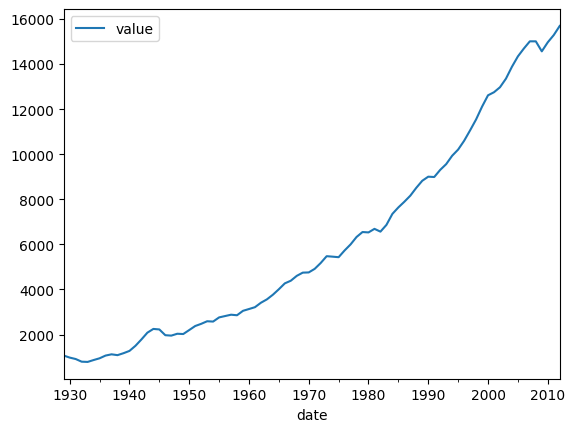

In [113]:
fred_data.plot(x='date',y='value')

**Lunch break until 1pm BST / 8am EST**
- latest notes in the chat

# Agenda for Afternoon
- calculated fields and quick stats
- `.apply()` - for more complex data cleaning and custom calcs
- filtering and sorting
- grouping data (pivot tables)
- merging data (stack with .concat, or side by side with .merge)

## Custom Calculated Fields 

In [2]:
import pandas as pd

In [54]:
sp500 = pd.read_csv('StockData/SP500.csv', parse_dates=['Date'],
                    index_col=['Date'], 
                    date_format='%m/%d/%y')

In [12]:
# sp500.info()
# sp500.loc['2016-01']
df = pd.read_excel('ExData/Data Manipulation Worksheet.xlsx',
                   sheet_name='Financing Table Clean')

In [15]:
sp500['Volume (mm)'] = sp500['Volume'] / 10**6

In [20]:
# sp500['Ticker'] = 'SP500'
#sp500['Year'] = sp500['Date'].dt.year
sp500['Year'] = sp500.index.year
sp500['Quarter'] = sp500.index.quarter
# sp500.info()

In [21]:
sp500.head(2)

,Open,High,Low,Close,Adj Close,Volume,Volume (mm),Year,Quarter
Date,,,,,,,,,
2013-09-30,1687.260010,1687.260010,1674.989990,1681.550049,1681.550049,3308630000,3308.63,2013,3
2013-10-01,1682.410034,1696.550049,1682.069946,1695.000000,1695.000000,3238690000,3238.69,2013,4


In [23]:
#Intraday Returns = (close - open) / open = close/open - 1
sp500['Intraday Return'] = sp500['Close'] / sp500['Open'] - 1
# sp500.head(2)

In [56]:
# sp500['Close Yesterday'] = sp500['Close'].shift(1)
# sp500['Daily Return'] = sp500['Close'] / sp500['Close Yesterday'] - 1
sp500['Daily Return'] = sp500['Close'] / sp500['Close'].shift(1) - 1
        #if dates sorted in ascending use shift(1)
        #if descending use shift(-1)

In [57]:
sp500['Returns'] = sp500['Close'].pct_change()
    #does the same thing as the x1 / x1.shift(1) - 1

In [36]:
# sp500.head()

In [25]:
sp500.to_excel('example sp500.xlsx')

In [43]:
sp500['Date'] = sp500.index
sp500['Date'].shift(1)

Date
2013-09-30          NaT
2013-10-01   2013-09-30
2013-10-02   2013-10-01
2013-10-03   2013-10-02
2013-10-04   2013-10-03
                ...    
2018-09-24   2018-09-21
2018-09-25   2018-09-24
2018-09-26   2018-09-25
2018-09-27   2018-09-26
2018-09-28   2018-09-27
Name: Date, Length: 1260, dtype: datetime64[ns]

In [52]:
sp500.drop(columns=['Year','Quarter','Volume (mm)'])
    #this is temporary
# sp500 = sp500.drop(columns=['Year','Quarter','Volume (mm)'])
sp500.drop(columns=['Year','Quarter','Volume (mm)'], inplace=True)

In [46]:
# table2 = sp500[['Close','Open']]
allCols = list(sp500.columns)
allCols.remove('Date')

In [47]:
table2 = sp500[allCols]

['Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'Volume (mm)',
 'Year',
 'Quarter',
 'Intraday Return',
 'Daily Return',
 'Returns']

### Sorting Columns and Index

In [59]:
sp500.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Daily Return',
       'Returns'],
      dtype='object')

In [63]:
sp500.sort_values('Close', ascending=False,inplace=True)

In [66]:
sp500.sort_index(inplace=True)
# sp500.head()

In [69]:
#Sort deals by industry alpha, and by size descending
df.sort_values( ['INDUSTRY','SIZE'], ascending=[True, False])

,DATE,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
436,2006-05-07,Tower Automotive Inc,Equity Follow-On Offering,206.250,Auto/Truck,Morgan Stanley
452,2006-05-09,"Regent Communications, Inc.",Equity Follow-On Offering,78.750,Broadcasting,Robertson Stephens
192,2006-03-12,Bayer Corp.,Sr Notes,500.290,Chemicals,Credit Suisse First Boston
292,2006-03-26,Eastman Chemical Company,Sr Notes,400.150,Chemicals,J.P. Morgan
468,2006-05-16,IDEX Corporation,Equity Follow-On Offering,207.000,Chemicals,Merrill Lynch
...,...,...,...,...,...,...
17,2006-01-30,Chugach Electic Assoc Inc,Sr Notes,180.200,Utility,J.P. Morgan
498,2006-06-03,PSE&G Energy Holdings Inc.,Notes,135.000,Utility,Lehman Brothers
406,2006-04-24,Duquesne Light Company,Preferred Securities,100.127,Utility,Salomon Smith Barney
200,2006-03-13,Mississippi Power Company,Sr Notes,80.200,Utility,Lehman Brothers


## Calculate Stats
- `.describe()` --> quick stats about numerical cols (count, mean, max, min, etc.)
- `df[col].mean()`, max, min, std

In [81]:
sp500.loc['2016'][['Close','Open','High']].corr()

,Close,Open,High
Close,1.000000,0.989403,0.995864
Open,0.989403,1.000000,0.996181
High,0.995864,0.996181,1.000000


In [77]:
sp500.corr() #correlation matrix
    #useful in ML forecasting to see what X variables are good predictors for your Y variable

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Returns
Open,1.000000,0.999542,0.999283,0.998797,0.998797,-0.109752,-0.014998,-0.014998
High,0.999542,1.000000,0.999158,0.999370,0.999370,-0.102874,0.005703,0.005703
Low,0.999283,0.999158,1.000000,0.999513,0.999513,-0.124338,0.013842,0.013842
Close,0.998797,0.999370,0.999513,1.000000,1.000000,-0.115267,0.031928,0.031928
Adj Close,0.998797,0.999370,0.999513,1.000000,1.000000,-0.115267,0.031928,0.031928
Volume,-0.109752,-0.102874,-0.124338,-0.115267,-0.115267,1.000000,-0.115006,-0.115006
Daily Return,-0.014998,0.005703,0.013842,0.031928,0.031928,-0.115006,1.000000,1.000000
Returns,-0.014998,0.005703,0.013842,0.031928,0.031928,-0.115006,1.000000,1.000000


In [76]:
sp500['Returns'].max(), sp500['Returns'].min()

(0.03903385909558632, -0.04097922501640738)

In [73]:
# sp500.describe()
sp500.loc['2017'][['Close','Returns']].describe()

,Close,Returns
count,251.000000,251.000000
mean,2449.076379,0.000716
std,109.417247,0.004212
min,2257.830078,-0.018178
25%,2365.584961,-0.001245
50%,2436.100098,0.000560
75%,2524.240112,0.002469
max,2690.159912,0.013674


In [79]:
#ratio between the share price and the average share price
sp500['Ratio to avg price'] = sp500['Close'] / sp500['Close'].mean()
# sp500

## Advanced Functions to Apply on Data
- helpful for custom cleaning of the data or custom calcs

Steps:
- create a new function (using def)
- df[Column].apply(function)
    - input to the function is what comes before .apply 

In [82]:
messy = pd.read_csv('ExData/sp500_Cos_ValMetrics.csv')

In [88]:
#regular python
messy_num = "46.9B"
clean = float(messy_num.strip('B'))
clean * 2

93.8

In [108]:
#messy['EV'] = messy['Enterprise Value'].str.strip('B').str.strip('T')
#messy[['EV','Enterprise Value']]

In [95]:
# messy['Symbol'].str.lower()
#df['ISSUER'].str.replace(' Corp','').str.replace(' Inc','')

In [84]:
# messy.info()
# messy.head(10)

,Symbol,Market Cap (intraday),Enterprise Value,Trailing P/E,Forward P/E,PEG Ratio (5 yr expected),Price/Sales (ttm),Price/Book (mrq),Enterprise Value/Revenue,Enterprise Value/EBITDA,Beta
0,A,45.29B,46.9B,49.92,32.38,3.33,7.79,9.42,8.06,30.30,1.01
1,AAL,12.84B,47.76B,NaN,-286.00,0.05,1.00,NaN,3.72,-4.44,1.85
2,AAP,13.67B,16.37B,22.45,17.10,1.55,1.27,3.87,1.52,13.20,1.38
3,AAPL,2.43T,2.4T,32.74,27.27,1.53,7.47,35.13,7.38,24.05,1.21
4,ABBV,208.26B,280.2B,40.48,8.44,2.04,4.15,15.18,5.58,11.42,0.80
5,ABC,23.69B,24.57B,NaN,10.88,1.04,0.12,NaN,0.12,8.92,0.54
6,ABMD,14.47B,13.78B,64.60,61.02,7.16,17.07,10.87,16.26,53.79,1.29
7,ABT,210.82B,222.2B,37.18,25.57,2.12,5.65,6.28,5.95,21.45,0.68
8,ACN,198.25B,187.3B,34.93,31.74,2.94,4.13,10.25,3.91,23.32,1.10
9,ADBE,288.23B,281.46B,52.43,43.12,2.62,20.03,20.83,19.56,49.13,0.95


In [101]:
#Create a function
def cleanData(x):
    #if T at end *1000, if B at end get rid of it, if nothing assume it's mm so / 1000
    if 'T' in x:
        return float(x.strip('T').replace(',','')) * 1000
    elif 'B' in x:
        return float(x.strip('B').replace(',',''))
    else:
        #pretend if no letter, then it's millions so divide by 1000
        return float(x.replace(',','')) / 1000

In [106]:
cleanData('5,220.99')

5.22099

In [113]:
messy['EV'] = messy['Enterprise Value'].apply(cleanData)
messy['Mkt Cap'] = messy['Market Cap (intraday)'].apply(cleanData)
messy[['EV','Enterprise Value','Mkt Cap']].head()

,EV,Enterprise Value,Mkt Cap
0,46.90,46.9B,45.29
1,47.76,47.76B,12.84
2,16.37,16.37B,13.67
3,2400.00,2.4T,2430.00
4,280.20,280.2B,208.26


**Using converters while importing the data**
- converters = {'column':functionClean}

In [114]:
clean = pd.read_csv('ExData/sp500_Cos_ValMetrics.csv', 
                    converters={'Enterprise Value':cleanData,
                               'Market Cap (intraday)':cleanData})
clean.head()

,Symbol,Market Cap (intraday),Enterprise Value,Trailing P/E,Forward P/E,PEG Ratio (5 yr expected),Price/Sales (ttm),Price/Book (mrq),Enterprise Value/Revenue,Enterprise Value/EBITDA,Beta
0,A,45.29,46.90,49.92,32.38,3.33,7.79,9.42,8.06,30.30,1.01
1,AAL,12.84,47.76,NaN,-286.00,0.05,1.00,NaN,3.72,-4.44,1.85
2,AAP,13.67,16.37,22.45,17.10,1.55,1.27,3.87,1.52,13.20,1.38
3,AAPL,2430.00,2400.00,32.74,27.27,1.53,7.47,35.13,7.38,24.05,1.21
4,ABBV,208.26,280.20,40.48,8.44,2.04,4.15,15.18,5.58,11.42,0.80


**Coffee break until 9:50 am EST / 2:50 pm BST**
- latest notes in the chat

When we come back:
- grouping data (pivots)
- filtering data
- mini assignment

## Grouping Data with Pandas
- `table.groupby(list of columns to categorize)[list of columns to calculate].function()`
- `table.groupby().agg(dictionary of functions for each col)`
    - e.g. `.agg( {'Returns':'mean','Close':'max'})`

In [129]:
pivot = df.groupby(  ['INDUSTRY','TYPE']  )[['SIZE']].mean()
pivot
#extracting data from multi index
    #e.g. what was the mean size in Utility --> Notes

SIZE
INDUSTRY       TYPE                                 
Auto/Truck     Equity Follow-On Offering  206.250000
Broadcasting   Equity Follow-On Offering   78.750000
Chemicals      Equity Follow-On Offering  107.885000
               Notes                      200.260000
               Sr Notes                   366.856667
...                                              ...
Transportation Sr Notes                   296.408000
Utility        Equity Follow-On Offering  396.130000
               Notes                      191.312500
               Preferred Securities       175.238500
               Sr Notes                   246.310000

[75 rows x 1 columns]

In [128]:
pivot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 75 entries, ('Auto/Truck', 'Equity Follow-On Offering') to ('Utility', 'Sr Notes')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SIZE    75 non-null     float64
dtypes: float64(1)
memory usage: 4.0+ KB


In [127]:
pivot.loc[('Utility', 'Notes')]['SIZE']

191.3125

In [ ]:
pivot.loc['Utility'] #all the averages sizes of ALL the types in Utility sector

,SIZE
TYPE,
Equity Follow-On Offering,396.1300
Notes,191.3125
Preferred Securities,175.2385
Sr Notes,246.3100


In [120]:
# df.groupby( ['INDUSTRY'] )[['SIZE']].sum()
        #Sumif function in excel --> summing by sector
df.groupby( ['INDUSTRY'] )[['SIZE']].count()
        #.max(), .min(), .std(), .mean(), ....
        # "count of Size by Industry"

,SIZE
INDUSTRY,
Auto/Truck,1
Broadcasting,1
Chemicals,8
Computers & Electronics,23
Construction/Bldg Prods,3
Consumer Products,5
Defense Contractors,3
Electric Services,1
Finance,362


In [132]:
#Average returns by year
sp500['Year'] = sp500.index.year

In [140]:
# sp500.groupby( ['Year'] )[['Returns','Close']].mean()
rules = {'Returns':'mean',
        'Close':['max','min'],
        'Volume':'sum'}
pivot2 = sp500.groupby( ['Year'] )[['Returns','Close','Volume']].agg( rules    )
pivot2

Returns        Close                     Volume
          mean          max          min           sum
Year                                                  
2013  0.001500  1848.359985  1655.449951  208543040000
2014  0.000454  2090.570068  1741.890015  845405230000
2015  0.000019  2130.820068  1867.609985  921218600000
2016  0.000395  2271.719971  1829.079956  984118470000
2017  0.000716  2690.159912  2257.830078  856488130000
2018  0.000497  2930.750000  2581.000000  651787380000

In [143]:
pivot2.loc[2015][('Close','min')] #multindex on the columns now

1867.609985

In [144]:
pivot2.T #transpose

Year                  2013          2014          2015          2016  \
Returns mean  1.499859e-03  4.537489e-04  1.856360e-05  3.954212e-04   
Close   max   1.848360e+03  2.090570e+03  2.130820e+03  2.271720e+03   
        min   1.655450e+03  1.741890e+03  1.867610e+03  1.829080e+03   
Volume  sum   2.085430e+11  8.454052e+11  9.212186e+11  9.841185e+11   

Year                  2017          2018  
Returns mean  7.161649e-04  4.971107e-04  
Close   max   2.690160e+03  2.930750e+03  
        min   2.257830e+03  2.581000e+03  
Volume  sum   8.564881e+11  6.517874e+11

In [145]:
pivot2.to_excel('returns by year.xlsx')

In [146]:
pd.pivot_table(df, values='SIZE', index='LEAD UNDERWRITER', columns='INDUSTRY',
              aggfunc='count')

INDUSTRY,Auto/Truck,Broadcasting,Chemicals,Computers & Electronics,Construction/Bldg Prods,Consumer Products,Defense Contractors,Electric Services,Finance,Food & Beverage,...,Metal & Steel,Oil & Gas,Paper & Packaging,Professional Services,Real Estate,Retail,Telecommunications,Textile,Transportation,Utility
LEAD UNDERWRITER,,,,,,,,,,,,,,,,,,,,,
ABN AMRO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Adams, Harkness & Hill Inc.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Banc of America Securities,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,39.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Bank One Capital Markets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Barclays Capital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Bear Stearns,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN
Credit Suisse First Boston,NaN,NaN,1.0,2.0,NaN,NaN,2.0,NaN,8.0,NaN,...,NaN,5.0,NaN,NaN,5.0,1.0,NaN,NaN,NaN,1.0
Deutsche Bank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,...,1.0,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN
"Friedman, Billings, Ramsey",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN


## Filtering
- and vs or logic:
    - AND --> all conditions have to be True to get a True
    - OR --> any of conditions could be True to get a True
    - AND --> &
    - OR --> |
- `table[cond1 & cond2 | cond3 & cond4]`
    - cleaner and easier to read if you set up the conditions as variables
    - cond1 = ....
- conditions need to be True/False columns (boolean maps)

In [160]:
df.columns

Index(['DATE', 'ISSUER', 'TYPE', 'SIZE', 'INDUSTRY', 'LEAD UNDERWRITER'], dtype='object')

In [162]:
x = 5
y = 6
y == x

False

In [167]:
#Poor practice to make multiple copies of the ENTIRE data set
    #memory intensive

# df_index_sector = df.set_index('INDUSTRY')
# df_index_sector_bank = df.set_index(['INDUSTRY','LEAD UNDERWRITER'])

In [166]:
#morgan stanley, real estate
cond1 = df['LEAD UNDERWRITER'] == 'Morgan Stanley'
cond2 = df['INDUSTRY'] == 'Real Estate'
filter1 = df[ cond1  &  cond2]
filter1

,DATE,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
427,2006-05-01,Mills Corp,Equity Follow-On Offering,177.13,Real Estate,Morgan Stanley
490,2006-05-30,Apartment Investment & Management,Equity Follow-On Offering,371.60,Real Estate,Morgan Stanley


In [170]:
#find all the days where returns > 3% and returns < -3%
# sp500['Returns'].describe()
cond1 = sp500['Returns'] >= 0.03
cond2 = sp500['Returns'] <= -0.03
sp500[cond1 | cond2]

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Returns,Ratio to avg price,Year
Date,,,,,,,,,,
2015-08-21,2034.079956,2034.079956,1970.890015,1970.890015,1970.890015,5018240000,-0.031851,-0.031851,0.892379,2015
2015-08-24,1965.150024,1965.150024,1867.010010,1893.209961,1893.209961,6612690000,-0.039414,-0.039414,0.857207,2015
2015-08-26,1872.750000,1943.089966,1872.750000,1940.510010,1940.510010,5338250000,0.039034,0.039034,0.878624,2015
2016-06-24,2103.810059,2103.810059,2032.569946,2037.410034,2037.410034,7597450000,-0.035920,-0.035920,0.922498,2016
2018-02-05,2741.060059,2763.389893,2638.169922,2648.939941,2648.939941,5283460000,-0.040979,-0.040979,1.199386,2018
2018-02-08,2685.010010,2685.270020,2580.560059,2581.000000,2581.000000,5305440000,-0.037536,-0.037536,1.168625,2018


## Working Session - until 4:20pm BST / 11:20 EST
- Ask for Help button on your Zoom bar
- Latest notes in Zoom chat and also on github:
    - https://github.com/TheMarqueeGroup/JPM_DS_EMEA_Apr2024/blob/main/day1_notes.ipynb

In [ ]:
#1) Load Apple data set (StockData --> aapl.csv) 
    #and Financing Deals data set (ExData --> Data Manip --> Clean tab)

#2) Find all the days of Apple where closing share price was between 70 and 75
    
#3) Financing Deals data (Data Manip file) --> find all deals done by GS and JPM

#4) Find all the deals done in May of 2006

#5) Find all the deals done by Merrill Lynch in Real Estate

#6) Calculate the returns of Apple's closing share price
    #what is the average return and standard deviation?

In [171]:
aapl = pd.read_csv('StockData/AAPL.csv', parse_dates=['Date'], index_col=['Date'])
aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-10-01 to 2018-09-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


C:\Users\V806013\AppData\Local\Temp\6\ipykernel_75044\848970074.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  aapl = pd.read_csv('StockData/AAPL.csv', parse_dates=['Date'], index_col=['Date'])


In [ ]:
#Q2 Find all the days of Apple where closing share price was between 70 and 75

In [175]:
filterQ2 = aapl[  (aapl['Close']>= 70)   &   (aapl['Close'] <=75)        ]

In [180]:
filterQ2 = aapl[  aapl['Close'].between(70,75, inclusive='both')       ]
# filterQ2

In [181]:
# pd.__version__

In [187]:
#Q3 GS and JPM
# df.head(10)
df['LEAD UNDERWRITER'].value_counts() #similar to groupby with a count function

LEAD UNDERWRITER
Merrill Lynch                     192
J.P. Morgan                        66
Salomon Smith Barney               57
Morgan Stanley                     50
Banc of America Securities         43
Goldman Sachs                      30
Credit Suisse First Boston         27
Lehman Brothers                    21
Deutsche Bank                      16
UBS Warburg                         9
Friedman, Billings, Ramsey          6
Bear Stearns                        6
Robertson Stephens                  5
Bank One Capital Markets            5
Wachovia Securities                 4
Robert W. Baird                     4
Jefferies & Company                 3
U.S. Bancorp Piper Jaffray Inc      2
Barclays Capital                    2
Needham & Company                   2
Adams, Harkness & Hill Inc.         1
Stephens Inc.                       1
Raymond James & Associates          1
McDonald Investments, Inc.          1
SoundView Technology Group          1
ABN AMRO                         

In [ ]:
sorted(df['LEAD UNDERWRITER'].unique())

['ABN AMRO',
 'Adams, Harkness & Hill Inc.',
 'Banc of America Securities',
 'Bank One Capital Markets',
 'Barclays Capital',
 'Bear Stearns',
 'Credit Suisse First Boston',
 'Deutsche Bank',
 'Friedman, Billings, Ramsey',
 'Goldman Sachs',
 'J.P. Morgan',
 'Jefferies & Company',
 'Lehman Brothers',
 'McDonald Investments, Inc.',
 'Merrill Lynch',
 'Morgan Stanley',
 'Needham & Company',
 'Raymond James & Associates',
 'Robert W. Baird',
 'Robertson Stephens',
 'Salomon Smith Barney',
 'SoundView Technology Group',
 'Stephens Inc.',
 'U.S. Bancorp Piper Jaffray Inc',
 'UBS Warburg',
 'Wachovia Securities',
 'William Blair & Company']

In [189]:
c1 = df['LEAD UNDERWRITER'] == 'Goldman Sachs'
c2 = df['LEAD UNDERWRITER'] == 'J.P. Morgan'
df[c1 |  c2]

,DATE,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
6,2006-01-28,National City Bank,Bank Notes,100.212,Finance,J.P. Morgan
10,2006-01-29,Southern Co. Capital Funding,Sr Notes,400.200,Utility,Goldman Sachs
17,2006-01-30,Chugach Electic Assoc Inc,Sr Notes,180.200,Utility,J.P. Morgan
30,2006-02-05,Aramark Corporation,Equity Follow-On Offering,793.500,Retail,Goldman Sachs
42,2006-02-06,"Netscreen Technologies, Inc.",Equity Follow-On Offering,184.000,Computers & Electronics,Goldman Sachs
...,...,...,...,...,...,...
528,2006-06-12,Westpac Banking Corp NY,CD Notes,100.102,Finance,J.P. Morgan
533,2006-06-13,Methanex Corporation,Sr Notes,200.130,Chemicals,Goldman Sachs
535,2006-06-13,National City Bank,Bank Notes,75.000,Finance,J.P. Morgan
537,2006-06-14,United Dominion Realty Trust Inc.,Sr Notes,150.000,Real Estate,Goldman Sachs


In [191]:
# .isin(list of categories to filter)
banks = ['Goldman Sachs', 'J.P. Morgan', 'Morgan Stanley', 'Lehman Brothers']
cond1 = df['LEAD UNDERWRITER'].isin(banks)
df[cond1]

,DATE,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
0,2006-01-28,US Bank N.A.,Global Notes,1000.210,Finance,Lehman Brothers
5,2006-01-28,SeaChange International Inc,Equity Follow-On Offering,104.200,Computers & Electronics,Morgan Stanley
6,2006-01-28,National City Bank,Bank Notes,100.212,Finance,J.P. Morgan
10,2006-01-29,Southern Co. Capital Funding,Sr Notes,400.200,Utility,Goldman Sachs
17,2006-01-30,Chugach Electic Assoc Inc,Sr Notes,180.200,Utility,J.P. Morgan
...,...,...,...,...,...,...
539,2006-06-17,St. Joe Co,Equity Follow-On Offering,203.000,Paper & Packaging,Morgan Stanley
542,2006-06-17,Hub International Ltd,Equity Follow-On Offering,84.000,Insurance,J.P. Morgan
552,2006-06-21,Alabama Power Company,Sr Notes,350.000,Utility,Lehman Brothers
554,2006-06-21,DQE Inc,Equity Follow-On Offering,202.500,Utility,Lehman Brothers


In [193]:
#4) Find all the deals done in May of 2006
#a) create 2 new columns, one for year one for month, filter on those 2
#b) DATE >= 2006-05-01  and DATE < 2006-06-01
#c) .loc['2006-05'] (change the index to DATE first)

In [195]:
#a) use dt.year and dt.month
c1 = df['DATE'].dt.month == 5
c2 = df['DATE'].dt.year  == 2006
df[c1 & c2].head()

,DATE,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
426,2006-05-01,Verizon New England Inc,Preferred Securities,450.100,Telecommunications,Morgan Stanley
427,2006-05-01,Mills Corp,Equity Follow-On Offering,177.130,Real Estate,Morgan Stanley
428,2006-05-01,Comerica Bank,Bank Notes,100.118,Finance,Salomon Smith Barney
429,2006-05-02,General Electric Capital Corporation,Global Notes,250.210,Finance,Lehman Brothers
430,2006-05-02,M&I Bank,CD Notes,100.117,Finance,Merrill Lynch


In [199]:
#b) range of dates
#df[df['DATE']=='2006-05'] #only defaults to May 1, not entire may
df[df['DATE'].between('2006-05-01', '2006-06-01', inclusive='left')]

,DATE,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
426,2006-05-01,Verizon New England Inc,Preferred Securities,450.100,Telecommunications,Morgan Stanley
427,2006-05-01,Mills Corp,Equity Follow-On Offering,177.130,Real Estate,Morgan Stanley
428,2006-05-01,Comerica Bank,Bank Notes,100.118,Finance,Salomon Smith Barney
429,2006-05-02,General Electric Capital Corporation,Global Notes,250.210,Finance,Lehman Brothers
430,2006-05-02,M&I Bank,CD Notes,100.117,Finance,Merrill Lynch
...,...,...,...,...,...,...
492,2006-05-30,Conectiv Inc.,Notes,250.130,Utility,Morgan Stanley
493,2006-05-30,Falconbridge Limited,Notes,250.140,Metal & Steel,Merrill Lynch
494,2006-05-30,PS Business Parks Inc,Equity Follow-On Offering,106.330,Real Estate,Goldman Sachs
495,2006-05-30,America First Mortgage Investments,Equity Follow-On Offering,81.900,Real Estate,"Friedman, Billings, Ramsey"


In [203]:
#c) using .loc
#df.loc['2006-05'] #this doesn't work YET!
df.set_index('DATE', inplace=True)
df.loc['2006-05']

,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
DATE,,,,,
2006-05-01,Verizon New England Inc,Preferred Securities,450.100,Telecommunications,Morgan Stanley
2006-05-01,Mills Corp,Equity Follow-On Offering,177.130,Real Estate,Morgan Stanley
2006-05-01,Comerica Bank,Bank Notes,100.118,Finance,Salomon Smith Barney
2006-05-02,General Electric Capital Corporation,Global Notes,250.210,Finance,Lehman Brothers
2006-05-02,M&I Bank,CD Notes,100.117,Finance,Merrill Lynch
...,...,...,...,...,...
2006-05-30,Conectiv Inc.,Notes,250.130,Utility,Morgan Stanley
2006-05-30,Falconbridge Limited,Notes,250.140,Metal & Steel,Merrill Lynch
2006-05-30,PS Business Parks Inc,Equity Follow-On Offering,106.330,Real Estate,Goldman Sachs


In [206]:
df.reset_index(inplace=True)
df

,DATE,ISSUER,TYPE,SIZE,INDUSTRY,LEAD UNDERWRITER
0,2006-01-28,US Bank N.A.,Global Notes,1000.21,Finance,Lehman Brothers
1,2006-01-28,Alliance National Muni Income Fund,Initial Public Offering,283.60,Finance,Salomon Smith Barney
2,2006-01-28,Lloyds Bank Plc NY,CD Notes,200.58,Finance,Merrill Lynch
3,2006-01-28,FBR Asset Investment Corp,Equity Follow-On Offering,127.20,Real Estate,"Friedman, Billings, Ramsey"
4,2006-01-28,Alliance California Muni Income Fund,Initial Public Offering,117.10,Finance,Salomon Smith Barney
...,...,...,...,...,...,...
552,2006-06-21,Alabama Power Company,Sr Notes,350.00,Utility,Lehman Brothers
553,2006-06-21,Sears Roebuck Acceptance Corp,Sr Notes,250.10,Finance,Merrill Lynch
554,2006-06-21,DQE Inc,Equity Follow-On Offering,202.50,Utility,Lehman Brothers
555,2006-06-21,MassMutual,Global Notes,200.10,Finance,Morgan Stanley


## Merging Data
- pd.concat(list of tables) --> stacking data on top of another

In [215]:
aapl['Ticker'] = 'AAPL'
sp500['Ticker'] = 'SP500'
stockData = pd.concat( [ aapl, sp500  ]   )
stockData

,Open,High,Low,Close,Adj Close,Volume,Ticker,Daily Return,Returns,Ratio to avg price,Year
Date,,,,,,,,,,,
2013-10-01,68.349998,69.877144,68.339996,69.708572,63.523125,88470900,AAPL,NaN,NaN,NaN,NaN
2013-10-02,69.375717,70.257141,69.107140,69.937141,63.731426,72296000,AAPL,NaN,NaN,NaN,NaN
2013-10-03,70.072861,70.335716,68.677139,69.058571,62.930801,80688300,AAPL,NaN,NaN,NaN,NaN
2013-10-04,69.122856,69.228569,68.371429,69.004288,62.881340,64717100,AAPL,NaN,NaN,NaN,NaN
2013-10-07,69.508568,70.378571,69.335716,69.678574,63.495800,78073100,AAPL,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2018-09-24,2921.830078,2923.790039,2912.629883,2919.370117,2919.370117,3372210000,SP500,-0.003516,-0.003516,1.321832,2018.0
2018-09-25,2921.750000,2923.949951,2913.699951,2915.560059,2915.560059,3285480000,SP500,-0.001305,-0.001305,1.320107,2018.0
2018-09-26,2916.979980,2931.149902,2903.280029,2905.969971,2905.969971,3388620000,SP500,-0.003289,-0.003289,1.315764,2018.0
